<a href="https://colab.research.google.com/github/NiliSoleil/CNN-MNIST/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**GPU**

In [ ]:
!nvidia-smi

# **Install**

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 87.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

# **Imports 📢**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch.backends.cudnn as cudnn

import torchvision
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import numpy as np

from torchmetrics import Accuracy
from tqdm import tqdm
from prettytable import PrettyTable

# **Dataset 🗂️**

## Transform

می توانید بعضی از آگمنت ها را حذف یا اضافه کنید

In [ ]:
transform_train = transforms.Compose([#transforms.RandomCrop(28, padding=4),
                                      #transforms.RandomAffine(degrees=30, translate=(0.1, 0.1), scale=(0.9, 1.1)),
                                      #transforms.ColorJitter(brightness=0.2, contrast=0.2),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.1307,), (0.3081,))
                                     ])

transform_test = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.1307,), (0.3081,))
                                     ])

## MNIST Dataset

In [ ]:
train_set = datasets.MNIST('./', train=True, transform = transform_train, download=True)

test_set = datasets.MNIST('./', train=False, transform = transform_test, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 158110206.52it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 92966764.25it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 48238401.58it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19539003.86it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



## DataLoader

In [ ]:
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=128, shuffle=False)

In [ ]:
x, y = next(iter(train_loader))
print(x.shape)
print(y.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


## Visualize

In [ ]:
def normalize_image(image):
  image_min = image.min()
  image_max = image.max()
  image.clamp_(min = image_min, max = image_max)
  image.add_(-image_min).div_(image_max - image_min + 1e-5)
  return image

def plot_images(images, labels, classes, normalize=True):
  n_images = len(images)

  rows = int(np.sqrt(n_images))
  cols = int(np.sqrt(n_images))

  fig = plt.figure(figsize=(10, 10))

  for i in range(rows*cols):

    plt.subplots_adjust(wspace=0.2, hspace=0.4)
    ax = fig.add_subplot(rows, cols, i+1)

    image = images[i]
    if normalize:
      image = normalize_image(image)

    ax.imshow(image.permute(1, 2, 0).squeeze().cpu().numpy())
    ax.set_title(classes[labels[i]])
    ax.axis('off')

نمایش داده ها بدون اعمال دیتاآگمنت

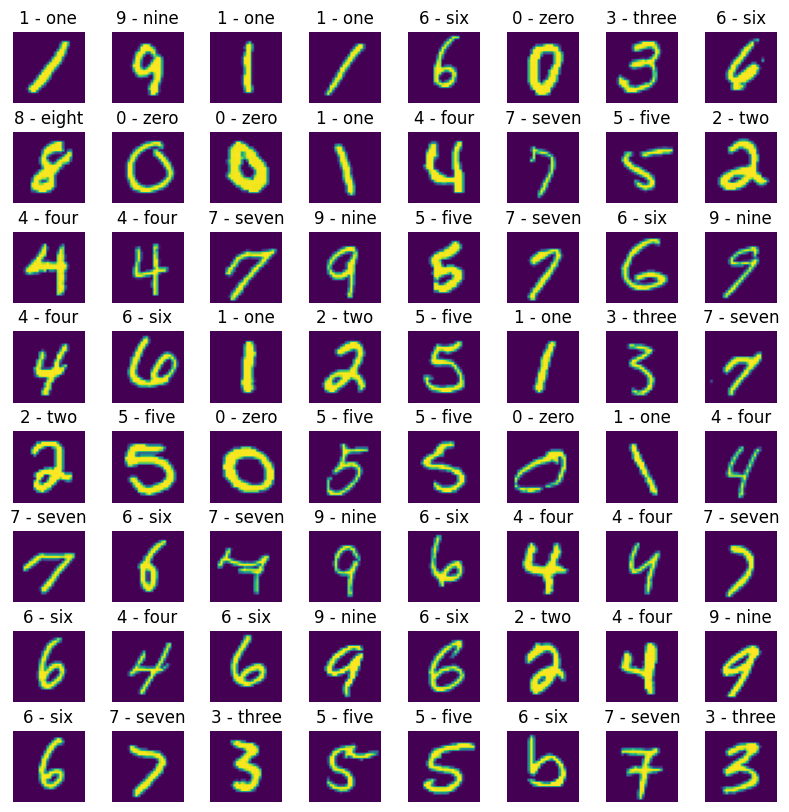

In [ ]:
batch = next(iter(train_loader))
classes = train_set.classes
plot_images(batch[0], batch[1], classes)

نمایش داده ها با اعمال دیتاآگمنت

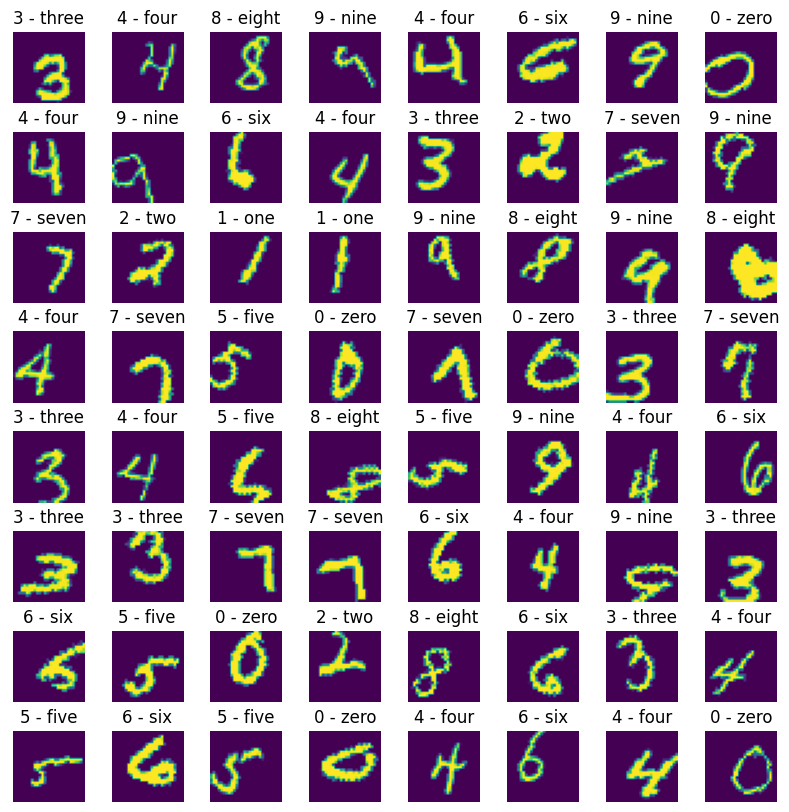

In [ ]:
batch = next(iter(train_loader))
classes = train_set.classes
plot_images(batch[0], batch[1], classes)

# **Model 🧠**

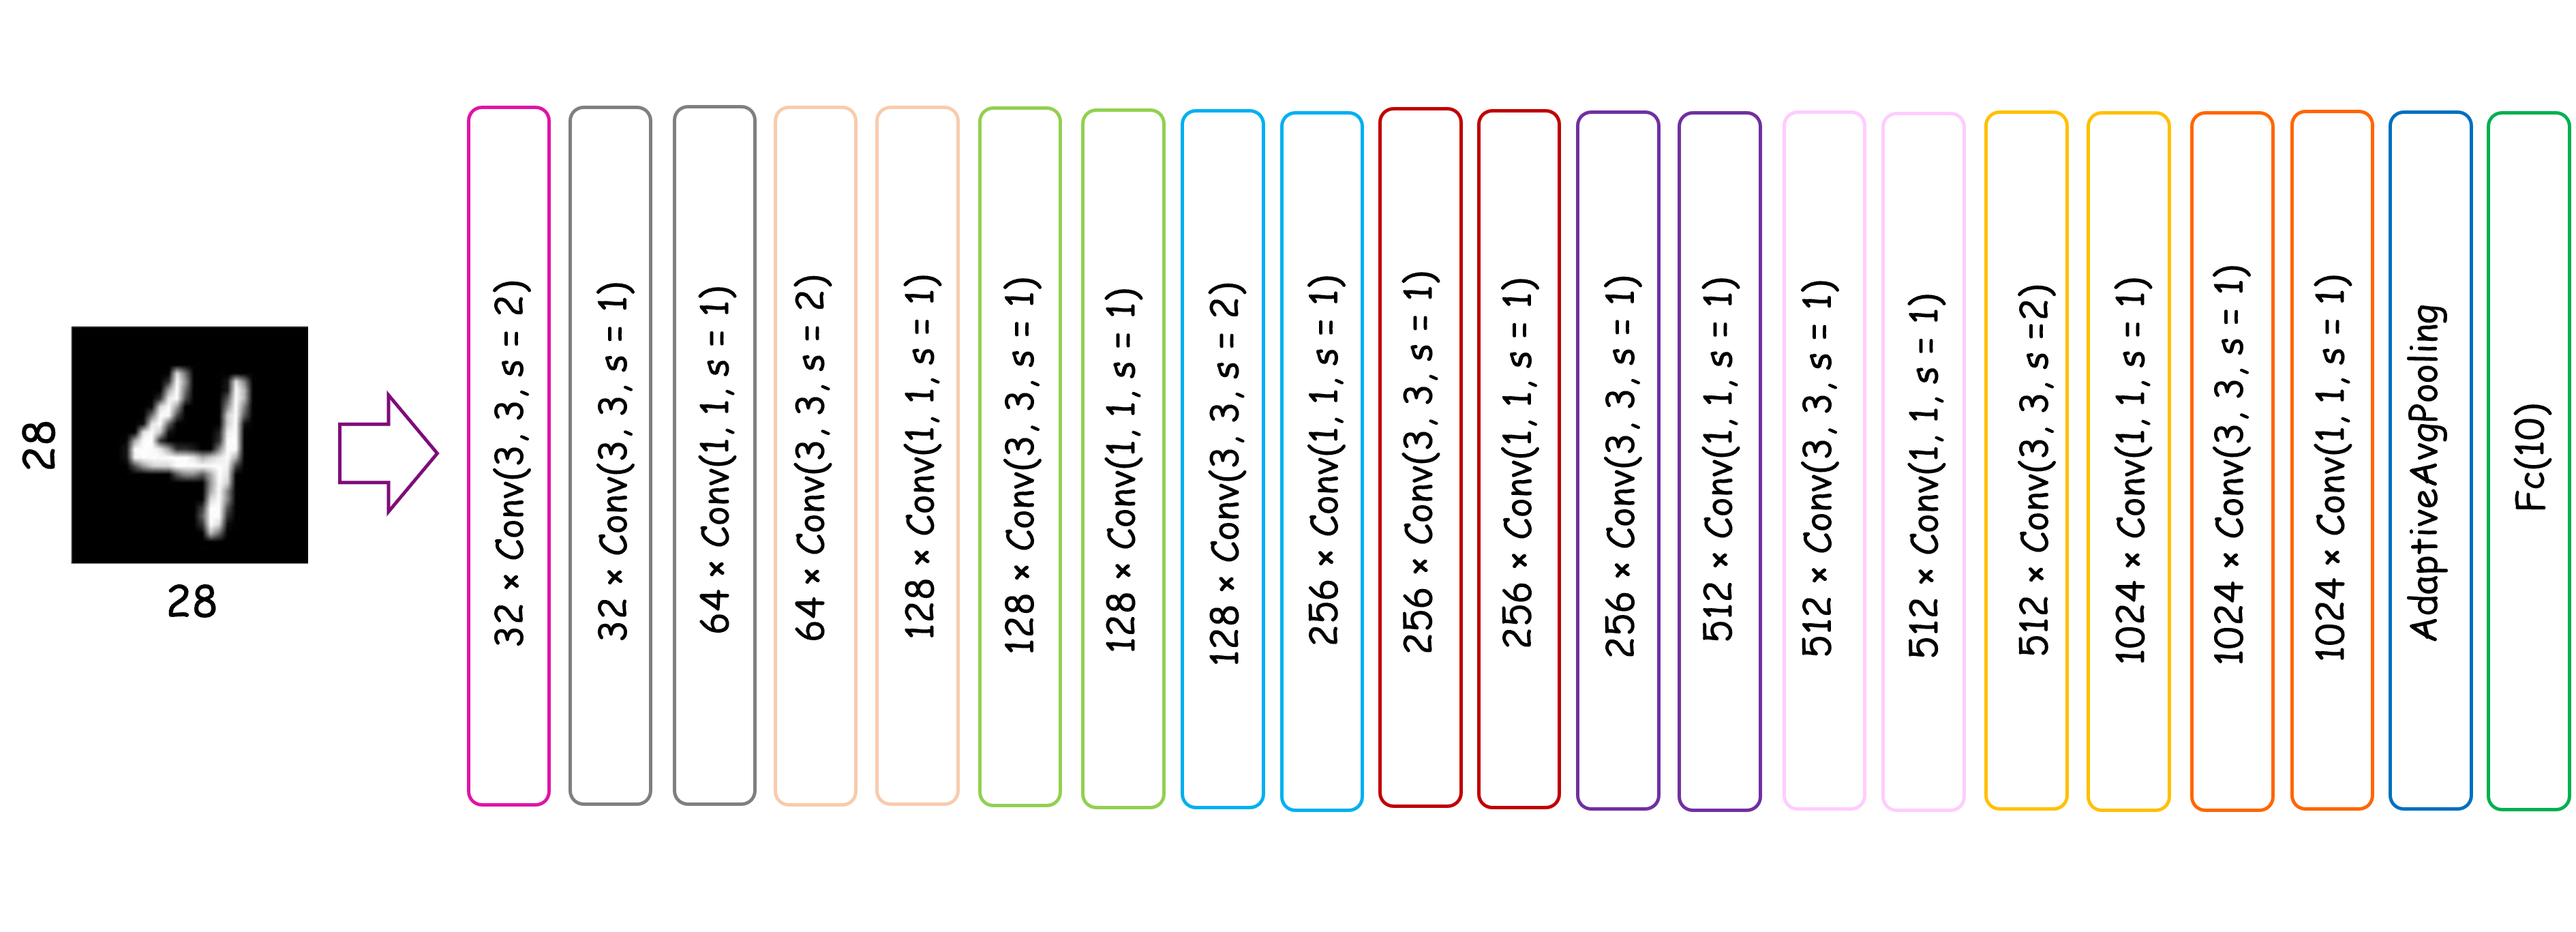

In [ ]:
def conv3x3_bn_af(in_channels, out_channels, kernel_size, stride):
  module = nn.Sequential(nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding=1),
                         nn.BatchNorm2d(out_channels),
                         nn.ReLU())
  return module


In [ ]:
def CNN():
  network = nn.Sequential(conv3x3_bn_af(1, 32, 3, 2),               # BSx32x14x14
                          conv3x3_bn_af(32, 32, 3, 1),              # BSx32x14x14

                           conv3x3_bn_af(32, 64, 1, 1),              # BSx64x16x16
                           conv3x3_bn_af(64, 64, 3, 2),              # BSx64x8x8

                           conv3x3_bn_af(64, 128, 1, 1),             # BSx128x10x10
                           conv3x3_bn_af(128, 128, 3, 1),            # BSx128x10x10
                           conv3x3_bn_af(128, 128, 1, 1),            # BSx128x12x12
                           conv3x3_bn_af(128, 128, 3, 2),            # BSx128x6x6

                           conv3x3_bn_af(128, 256, 1, 1),            # BSx256x8x8
                           conv3x3_bn_af(256, 256, 3, 1),            # BSx256x8x8
                           conv3x3_bn_af(256, 256, 1, 1),            # BSx256x10x10
                           conv3x3_bn_af(256, 256, 3, 1),            # BSx256x10x10

                           conv3x3_bn_af(256, 512, 1, 1),            # BSx512x12x12
                           conv3x3_bn_af(512, 512, 3, 1),            # BSx512x12x12
                           conv3x3_bn_af(512, 512, 1, 1),            # BSx512x14x14
                           conv3x3_bn_af(512, 512, 3, 2),            # BSx512x7x7

                           conv3x3_bn_af(512, 1024, 1, 1),           # BSx1024x9x9
                           conv3x3_bn_af(1024, 1024, 3, 1),          # BSx1024x9x9
                           conv3x3_bn_af(1024, 1024, 1, 1),          # BSx1024x11x11
                           nn.AdaptiveAvgPool2d(output_size=(1, 1)), # BSx1024x1x1

                           nn.Flatten(),
                           nn.Linear(1024, 10)
                      )

  return network


In [ ]:
model = CNN()
model(torch.randn(20, 1, 28, 28)).shape

torch.Size([20, 10])

In [ ]:
def num_params(model):
  nums = sum(p.numel() for p in model.parameters())/1e6
  return nums

In [ ]:
num_params(model)

17.798506

# **Device ⚙️**

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CNN().to(device)

# **Loss & Optimizer ⚖️**

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# **Utils 🧰**

In [ ]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

# **Functions** 🧮

In [ ]:
def train_one_epoch(model, train_loader, loss_fn, optimizer, epoch=None):
  model.train()
  loss_train = AverageMeter()
  acc_train = Accuracy(task="multiclass", num_classes=10).to(device)
  with tqdm(train_loader, unit="batch") as tepoch:
    for inputs, targets in tepoch:
      if epoch is not None:
        tepoch.set_description(f"Epoch {epoch}")
      inputs = inputs.to(device)
      targets = targets.to(device)

      outputs = model(inputs)

      loss = loss_fn(outputs, targets)

      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

      loss_train.update(loss.item())
      acc_train(outputs, targets.int())
      tepoch.set_postfix(loss=loss_train.avg,
                         accuracy=100.*acc_train.compute().item())
  return model, loss_train.avg, acc_train.compute().item()

In [ ]:
def validation(model, test_loader, loss_fn):
  model.eval()
  with torch.no_grad():
    loss_valid = AverageMeter()
    acc_valid = Accuracy(task="multiclass", num_classes=10).to(device)
    for i, (inputs, targets) in enumerate(test_loader):
      inputs = inputs.to(device)
      targets = targets.to(device)

      outputs = model(inputs)
      loss = loss_fn(outputs, targets)

      loss_valid.update(loss.item())
      acc_valid(outputs, targets.int())
  return loss_valid.avg, acc_valid.compute().item()

# **Efficient way to set hyperparams 🔨**

## Step 1: check forward path

Calculate loss for one batch

In [ ]:
x_batch, y_batch = next(iter(train_loader))
outputs = model(x_batch.to(device))
loss = loss_fn(outputs, y_batch.to(device))
print(loss)

tensor(2.3511, device='cuda:0', grad_fn=<NllLossBackward0>)


## Step 2: check backward path

Select 5 random batches and train the model

In [ ]:
_, mini_train_dataset = random_split(train_set, (len(train_set)-1000, 1000))
mini_train_loader = DataLoader(mini_train_dataset, 20)

In [ ]:
num_epochs = 10
for epoch in range(num_epochs):
  model, _, _ = train_one_epoch(model, mini_train_loader, loss_fn, optimizer, epoch)

Epoch 9: 100%|██████████| 50/50 [00:02<00:00, 16.69batch/s, accuracy=98.6, loss=0.0638]


## Step 3: select best lr

Train all data for one epoch

In [ ]:
num_epochs = 1
table_best_lr = PrettyTable([ "Learning Rate", "loss"])
for lr in [0.1, 0.01, 0.001, 0.0001]:
  print(f'LR={lr}')
  model = CNN().to(device)
  optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=1e-4, momentum=0.9)
  for epoch in range(num_epochs):
    model, loss, accuracy = train_one_epoch(model, train_loader, loss_fn, optimizer, epoch) # without augmentation
    if epoch == num_epochs-1:
      table_best_lr.add_row([lr, f'{loss:.4f}'])
  print()

print(table_best_lr)

LR=0.1


Epoch 0: 100%|██████████| 938/938 [02:15<00:00,  6.93batch/s, accuracy=92.5, loss=0.242]



LR=0.01


Epoch 0: 100%|██████████| 938/938 [02:16<00:00,  6.89batch/s, accuracy=93.8, loss=0.197]



LR=0.001


Epoch 0: 100%|██████████| 938/938 [02:16<00:00,  6.87batch/s, accuracy=83.6, loss=0.567]



LR=0.0001


Epoch 0: 100%|██████████| 938/938 [02:16<00:00,  6.90batch/s, accuracy=30.7, loss=2.08]


+---------------+--------+
| Learning Rate |  loss  |
+---------------+--------+
|      0.1      | 0.2420 |
|      0.01     | 0.1973 |
|     0.001     | 0.5673 |
|     0.0001    | 2.0821 |
+---------------+--------+


## Step 4: small grid (optional)

Create a small grid based on the WD and the best LR



In [ ]:
num_epochs = 3
my_table = PrettyTable([ "Learning Rate", "Weight decay", "accuracy", "loss"])

for lr in [0.01, 0.05, 0.001, 0.005]:
  for wd in [1e-6, 1e-5, 1e-4]:

    model = CNN().to(device)
    optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=wd, momentum=0.9)

    print(f'LR={lr}, WD={wd}')

    for epoch in range(num_epochs):

      model, loss, accuracy = train_one_epoch(model, train_loader, loss_fn, optimizer, epoch) # without augmentation

      if epoch == num_epochs-1:
        my_table.add_row([lr, wd, f'{100.*accuracy:.4f}', f'{loss:.4f}'])

    print()

  my_table.add_row([20*'=', 20*'=', 20*'=', 20*'='])

print(my_table)

LR=0.01, WD=1e-06


Epoch 2: 100%|██████████| 938/938 [02:15<00:00,  6.91batch/s, accuracy=99.1, loss=0.0321]



LR=0.01, WD=1e-05


Epoch 2: 100%|██████████| 938/938 [02:15<00:00,  6.92batch/s, accuracy=99.1, loss=0.0296]



LR=0.01, WD=0.0001


Epoch 2: 100%|██████████| 938/938 [02:16<00:00,  6.87batch/s, accuracy=99, loss=0.0338]



LR=0.05, WD=1e-06


Epoch 2: 100%|██████████| 938/938 [02:15<00:00,  6.91batch/s, accuracy=98.8, loss=0.042]



LR=0.05, WD=1e-05


Epoch 2: 100%|██████████| 938/938 [02:15<00:00,  6.90batch/s, accuracy=98.8, loss=0.0437]



LR=0.05, WD=0.0001


Epoch 2: 100%|██████████| 938/938 [02:16<00:00,  6.89batch/s, accuracy=98.7, loss=0.0451]



LR=0.001, WD=1e-06


Epoch 2: 100%|██████████| 938/938 [02:15<00:00,  6.92batch/s, accuracy=99, loss=0.0373]



LR=0.001, WD=1e-05


Epoch 2: 100%|██████████| 938/938 [02:15<00:00,  6.95batch/s, accuracy=99.1, loss=0.0355]



LR=0.001, WD=0.0001


Epoch 2: 100%|██████████| 938/938 [02:15<00:00,  6.93batch/s, accuracy=99.1, loss=0.0343]



LR=0.005, WD=1e-06


Epoch 2: 100%|██████████| 938/938 [02:16<00:00,  6.89batch/s, accuracy=99.1, loss=0.0306]



LR=0.005, WD=1e-05


Epoch 2: 100%|██████████| 938/938 [02:15<00:00,  6.92batch/s, accuracy=99.1, loss=0.0299]



LR=0.005, WD=0.0001


Epoch 2: 100%|██████████| 938/938 [02:15<00:00,  6.93batch/s, accuracy=99, loss=0.0311]


+----------------------+----------------------+----------------------+----------------------+
|    Learning Rate     |     Weight decay     |       accuracy       |         loss         |
+----------------------+----------------------+----------------------+----------------------+
| ==================== | ==================== | ==================== | ==================== |
| ==================== | ==================== | ==================== | ==================== |
| ==================== | ==================== | ==================== | ==================== |
| ==================== | ==================== | ==================== | ==================== |
+----------------------+----------------------+----------------------+----------------------+


## Step 5: train more epochs

In [ ]:
model = CNN().to(device)

In [ ]:
lr = 0.005
wd = 1e-5
optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=wd, momentum=0.9)

In [ ]:
loss_train_hist = []
loss_valid_hist = []

acc_train_hist = []
acc_valid_hist = []

best_loss_valid = torch.inf
epoch_counter = 0

In [ ]:
num_epochs = 20

for epoch in range(num_epochs):
  # Train
  model, loss_train, acc_train = train_one_epoch(model, train_loader, loss_fn, optimizer,epoch)

  # Validation
  loss_valid, acc_valid = validation(model, test_loader, loss_fn)

  loss_train_hist.append(loss_train)
  loss_valid_hist.append(loss_valid)

  acc_train_hist.append(acc_train)
  acc_valid_hist.append(acc_valid)

  if loss_valid < best_loss_valid:
    # torch.save(model, '/content/model.pt')
    torch.save(model, '/content/model_aug.pt')
    best_loss_valid = loss_valid
    print('model saved!')

  print(f'Valid: Loss = {loss_valid:.4}, Acc = {acc_valid:.4}')
  print()

  epoch_counter += 1

Epoch 0: 100%|██████████| 938/938 [02:15<00:00,  6.92batch/s, accuracy=92.8, loss=0.232]


model saved!
Valid: Loss = 0.05808, Acc = 0.9822



Epoch 1: 100%|██████████| 938/938 [02:15<00:00,  6.95batch/s, accuracy=98.6, loss=0.0499]


model saved!
Valid: Loss = 0.03105, Acc = 0.9899



Epoch 2: 100%|██████████| 938/938 [02:16<00:00,  6.89batch/s, accuracy=99.2, loss=0.0291]


Valid: Loss = 0.03806, Acc = 0.9883



Epoch 3: 100%|██████████| 938/938 [02:15<00:00,  6.90batch/s, accuracy=99.3, loss=0.0219]


Valid: Loss = 0.0351, Acc = 0.9898



Epoch 4: 100%|██████████| 938/938 [02:15<00:00,  6.91batch/s, accuracy=99.5, loss=0.0172]


model saved!
Valid: Loss = 0.02583, Acc = 0.9928



Epoch 5: 100%|██████████| 938/938 [02:15<00:00,  6.94batch/s, accuracy=99.6, loss=0.0143]


model saved!
Valid: Loss = 0.02167, Acc = 0.9934



Epoch 6: 100%|██████████| 938/938 [02:15<00:00,  6.92batch/s, accuracy=99.7, loss=0.00912]


Valid: Loss = 0.02771, Acc = 0.992



Epoch 7: 100%|██████████| 938/938 [02:15<00:00,  6.92batch/s, accuracy=99.8, loss=0.00779]


Valid: Loss = 0.02858, Acc = 0.9923



Epoch 8: 100%|██████████| 938/938 [02:15<00:00,  6.92batch/s, accuracy=99.8, loss=0.00521]


Valid: Loss = 0.02774, Acc = 0.9916



Epoch 9: 100%|██████████| 938/938 [02:15<00:00,  6.94batch/s, accuracy=99.8, loss=0.0056]


Valid: Loss = 0.02705, Acc = 0.9928



Epoch 10: 100%|██████████| 938/938 [02:15<00:00,  6.93batch/s, accuracy=99.8, loss=0.00583]


Valid: Loss = 0.02884, Acc = 0.9921



Epoch 11: 100%|██████████| 938/938 [02:15<00:00,  6.93batch/s, accuracy=99.8, loss=0.00578]


Valid: Loss = 0.02384, Acc = 0.9933



Epoch 12: 100%|██████████| 938/938 [02:15<00:00,  6.92batch/s, accuracy=99.8, loss=0.00584]


Valid: Loss = 0.0386, Acc = 0.9911



Epoch 13: 100%|██████████| 938/938 [02:15<00:00,  6.91batch/s, accuracy=99.9, loss=0.00307]


Valid: Loss = 0.02295, Acc = 0.9938



Epoch 14: 100%|██████████| 938/938 [02:15<00:00,  6.90batch/s, accuracy=99.9, loss=0.00269]


model saved!
Valid: Loss = 0.01936, Acc = 0.995



Epoch 15: 100%|██████████| 938/938 [02:15<00:00,  6.92batch/s, accuracy=100, loss=0.00146]


Valid: Loss = 0.02208, Acc = 0.995



Epoch 16: 100%|██████████| 938/938 [02:15<00:00,  6.92batch/s, accuracy=100, loss=0.000544]


Valid: Loss = 0.02053, Acc = 0.9956



Epoch 17: 100%|██████████| 938/938 [02:15<00:00,  6.93batch/s, accuracy=100, loss=0.000197]


Valid: Loss = 0.02146, Acc = 0.9947



Epoch 18: 100%|██████████| 938/938 [02:15<00:00,  6.92batch/s, accuracy=100, loss=0.000177]


Valid: Loss = 0.02256, Acc = 0.9954



Epoch 19: 100%|██████████| 938/938 [02:15<00:00,  6.94batch/s, accuracy=100, loss=0.000126]


Valid: Loss = 0.02161, Acc = 0.9952



# **Plot 📈**

**Plots without Data Augmentation**

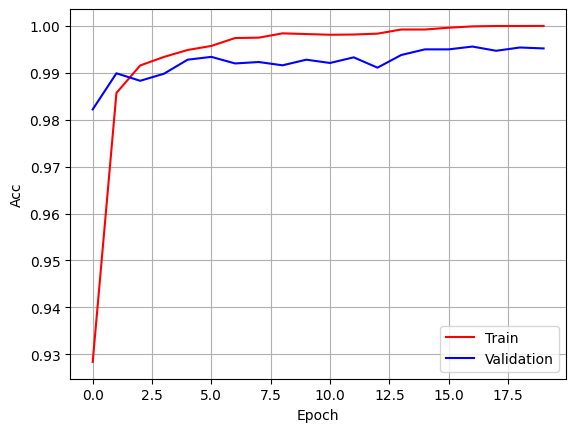

In [ ]:
plt.plot(range(num_epochs), acc_train_hist, 'r-', label='Train')
plt.plot(range(num_epochs), acc_valid_hist, 'b-', label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.grid(True)
plt.legend()

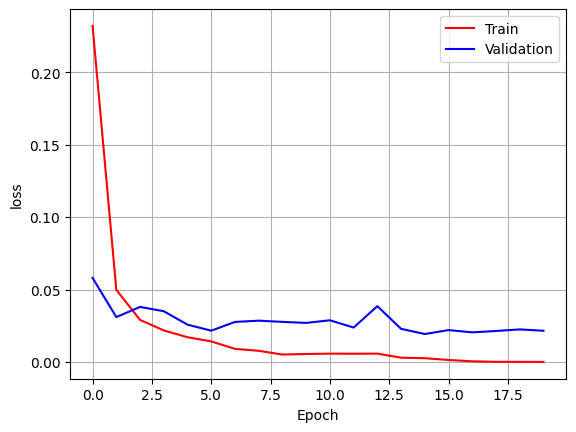

In [ ]:
plt.plot(range(num_epochs), loss_train_hist, 'r-', label='Train')
plt.plot(range(num_epochs), loss_valid_hist, 'b-', label='Validation')

plt.xlabel('Epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

Plots with Data Augmentation

In [ ]:
transform_train = transforms.Compose([transforms.RandomCrop(28, padding=4),
                                      transforms.RandomAffine(degrees=30, translate=(0.1, 0.1), scale=(0.9, 1.1)),
                                      transforms.ColorJitter(brightness=0.2, contrast=0.2),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.1307,), (0.3081,))
                                     ])

transform_test = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.1307,), (0.3081,))
                                     ])

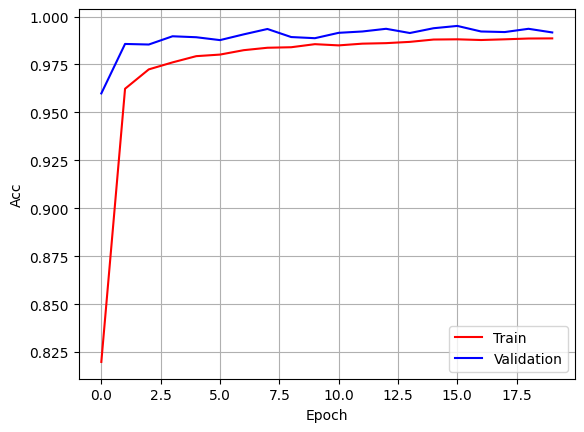

In [ ]:
plt.plot(range(num_epochs), acc_train_hist, 'r-', label='Train')
plt.plot(range(num_epochs), acc_valid_hist, 'b-', label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.grid(True)
plt.legend()

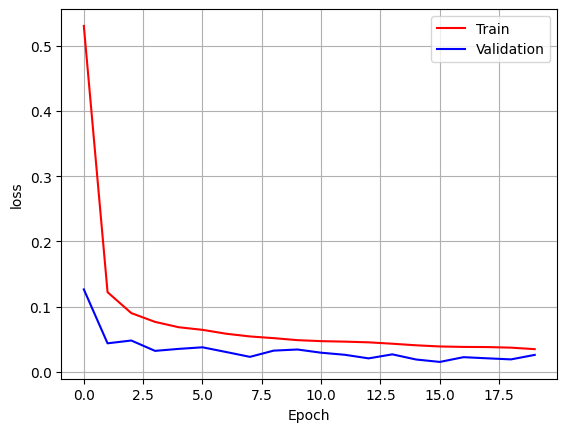

In [ ]:
plt.plot(range(num_epochs), loss_train_hist, 'r-', label='Train')
plt.plot(range(num_epochs), loss_valid_hist, 'b-', label='Validation')

plt.xlabel('Epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

# **Save 💰**

In [ ]:
torch.save(model, '/content/model.pt')